In [1]:
import sklearn.linear_model

In [2]:
%matplotlib inline
import pandas
import matplotlib.pyplot

In [3]:
trains = pandas.read_csv('../../data/sydtrains.csv', thousands='.', index_col='STATION')

In [4]:
trains2014 = trains[trains.YEAR == 2014]

In [5]:
trains2014.columns

Index([u'LINE', u'YEAR', u'SURVEY_DATE_USED', u'WHETHER_SURVEYED',
       u'IN_0200_0600', u'OUT_0200_0600', u'IN_0600_0930', u'OUT_0600_0930',
       u'IN_0930_1500', u'OUT_0930_1500', u'IN_1500_1830', u'OUT_1500_1830',
       u'IN_1830_0200', u'OUT_1830_0200', u'IN_24_HOURS', u'OUT_24_HOURS',
       u'RANK', u'STATION_SORT_ID'],
      dtype='object')

In [6]:
scatter_data_in = trains2014.loc[:, ["IN_1500_1830" , "IN_1830_0200",  "OUT_0600_0930"]]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150f5290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11538d690>]], dtype=object)

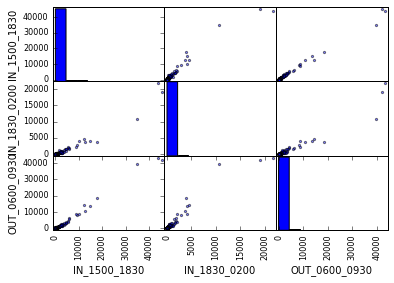

In [7]:
pandas.scatter_matrix(scatter_data_in)

In [8]:
people_in_the_am = trains2014.loc[:, ["OUT_0600_0930"]]

In [9]:
people_in_the_pm = trains2014.IN_1500_1830

In [10]:
regressor = sklearn.linear_model.RANSACRegressor()

In [11]:
regressor.fit(people_in_the_am, people_in_the_pm)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        max_trials=100, min_samples=None, random_state=None,
        residual_metric=None, residual_threshold=None, stop_n_inliers=inf,
        stop_probability=0.99, stop_score=inf)

In [12]:
predictions_for_pm = regressor.predict(people_in_the_am)

In [13]:
predictions_for_pm

array([  5.07667776e+04,   5.21423159e+04,   4.78105769e+04,
         1.65351803e+04,   2.21338624e+04,   1.29032766e+04,
         9.89881139e+03,   5.25335317e+03,   4.89136941e+03,
         1.05624483e+04,   1.71988172e+04,   2.65913624e+03,
         1.07434402e+04,   4.07087289e+03,   3.53996338e+03,
         4.61384853e+03,   2.73153299e+03,   2.42987986e+03,
         3.58822788e+03,   1.95930098e+03,   2.16442511e+03,
         7.59418147e+03,   1.91103648e+03,   3.88988102e+03,
         7.09947033e+03,   9.45746455e+02,   1.29566409e+03,
         2.18855736e+03,   2.74359912e+03,   1.76624297e+03,
         1.59731722e+03,   2.98492162e+03,   1.99549935e+03,
         8.73349704e+02,   2.22475573e+03,   4.31219540e+03,
         1.06640771e+03,   2.55054111e+03,   1.58525109e+03,
         8.25085203e+02,   1.25946571e+03,   2.80392974e+03,
         1.83863972e+03,   1.34392859e+03,   1.28359796e+03,
         1.11467221e+03,   3.50376501e+03,   1.21120121e+03,
         2.07996223e+03,

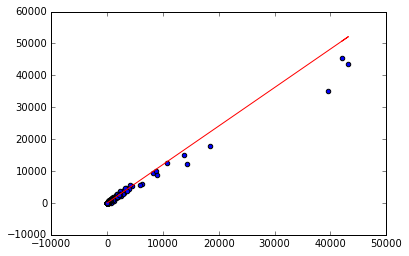

In [14]:
matplotlib.pyplot.scatter(trains2014.OUT_0600_0930, trains2014.IN_1500_1830)
matplotlib.pyplot.plot(trains2014.OUT_0600_0930, predictions_for_pm, color='red')

In [15]:
regressor.estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
regressor.estimator_.coef_

array([ 1.20661252])

In [17]:
regressor.estimator_.intercept_

4.5886856967807717